# Individual Algo Strong Scaling (input types on same plots)

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("cali_files/sample_sort_mpi_cali/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [3]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              1735292          2.494631   
                                                  2916813         44.932654   
                                                  18518990         0.297484   
                                                  19466114         5.093647   
                                                  81163840         6.882013   
                                                  93252456        19.817689   
                                                  94415284         2.896119   
                                                  97341737        42.253099   
                                                  110376527        0.055659   
                                                  120512663       54.336148   
                                                  130822727       47.643797   
                                                  132571558        0.476772   
                                                  135798515        2.387519   
                                                  154682660      266.736755   
                                                  158744347       35.568707   
                                                  166805621       33.820124   
                                                  190955046       11.399593   
                                                  199358056        1.974039   
                                                  202616412        5.590988   
                                                  212977515       35.561838   
                                                  228935524        1.086856   
                                                  241709788        0.218309   
                                                  274468628        0.255655   
                                                  338546642       33.508094   
                                                  344017165        3.618537   
                                                  349143071       34.927946   
                                                  365476483        0.733177   
                                                  383857579       33.661040   
                                                  400363707        0.281103   
                                                  400769906      236.702102   
                                                  404519659        4.472635   
                                                  444453520        2.748463   
                                                  454991035       41.143605   
                                                  465565920        7.036613   
                                                  485152607        4.105182   
                                                  496561508      250.662330   
                                                  500368337        0.587640   
                                                  510452497        1.842465   
                                                  554567779       22.097954   
                                                  554602542       10.661800   
                                                  562704291        0.239427   
                                                  566785762        0.117574   
                                                  570016264        0.249134   
                                                  635876369       39.762919   
                                                  648458368        0.283778   
                                                  648584791       14.363710   
                                                  656877182        1.399598   
                                                  690656929        6.740509   
                                                  695075506      227.153600   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Recv
│  │  └─ 1.000 MPI_Send
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Bcast
│     └─ 1.000 MPI_Gather
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
1735292              2.11.0-dev               8   
2916813              2.11.0-dev             512   
18518990             2.11.0-dev              32   
19466114             2.11.0-dev              16   
81163840             2.11.0-dev             256   
93252456             2.11.0-dev             256   
94415284             2.11.0-dev              32   
97341737             2.11.0-dev             512   
110376527            2.11.0-dev               2   
120512663            2.11.0-dev               4   
130822727            2.11.0-dev              64   
132571558            2.11.0-dev              16   
135798515            2.11.0-dev              16   
154682660            2.11.0-dev               2   
158744347            2.11.0-dev             512   
166805621            2.11.0-dev             512   
190955046            2.11.0-dev              64   
199358056            2.11.0-dev               2   
202616412            2.11.0-dev             128   
212977515            2.11.0-dev              32   
228935524            2.11.0-dev              32   
241709788            2.11.0-dev              16   
274468628            2.11.0-dev              64   
338546642            2.11.0-dev             512   
344017165            2.11.0-dev             128   
349143071            2.11.0-dev             512   
365476483            2.11.0-dev              32   
383857579            2.11.0-dev             512   
400363707            2.11.0-dev              64   
400769906            2.11.0-dev            1024   
404519659            2.11.0-dev              32   
444453520            2.11.0-dev               4   
454991035            2.11.0-dev              16   
465565920            2.11.0-dev             256   
485152607            2.11.0-dev              64   
496561508            2.11.0-dev            1024   
500368337            2.11.0-dev              64   
510452497            2.11.0-dev             128   
554567779            2.11.0-dev               4   
554602542            2.11.0-dev              32   
562704291            2.11.0-dev              64   
566785762            2.11.0-dev               4   
570016264            2.11.0-dev               8   
635876369            2.11.0-dev             512   
648458368            2.11.0-dev               2   
648584791            2.11.0-dev               2   
656877182            2.11.0-dev              16   
690656929            2.11.0-dev             256   
695075506            2.11.0-dev            1024   
720300068            2.11.0-dev              16   
730548031            2.11.0-dev               2   
740334444            2.11.0-dev               8   
746394895            2.11.0-dev              32   
749061779            2.11.0-dev            1024   
756868170            2.11.0-dev               4   
773597652            2.11.0-dev              64   
783482910            2.11.0-dev             512   
802165993            2.11.0-dev               4   
804698893            2.11.0-dev               8   
827263320            2.11.0-dev              16   
852930361            2.11.0-dev            1024   
859988027            2.11.0-dev             256   
861081225            2.11.0-dev               2   
869165960            2.11.0-dev            1024   
871694213            2.11.0-dev            1024   
879715497            2.11.0-dev             512   
899216769            2.11.0-dev             256   
905543418            2.11.0-dev              64   
963425917            2.11.0-dev             128   
970010150            2.11.0-dev             256   
980764931            2.11.0-dev               8   
985780102            2.11.0-dev             256   
987154844            2.11.0-dev            1024   
1000990651           2.11.0-dev              64   
1003582905           2.11.0-dev            1024   
1014709171           2.11.0-dev               2   
1030641782           2.11.0-dev  

In [6]:
gb = tk.groupby("InputSize")
print(gb.keys())
allthickets = list(gb.values())
input65536 = gb[65536].groupby("InputType")
input262144 = gb[262144].groupby("InputType")
input1048576 = gb[1048576].groupby("InputType")
input4194304 = gb[4194304].groupby("InputType")
input16777216 = gb[16777216].groupby("InputType")
input67108864 = gb[67108864].groupby("InputType")
input268435456 = gb[268435456].groupby("InputType")

# inputsorted = gb['sorted'].groupby("InputType")
# inputreversed = gb['reversed'].groupby("InputSize")
# inputperturbed = gb['1 perturbed'].groupby("InputSize")
# inputrandom = gb['random'].groupby("InputSize")

8  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ac6e80c4910>, 262144: <thicket.thicket.Thicket object at 0x2ac6e82af880>, 1048576: <thicket.thicket.Thicket object at 0x2ac6e8221790>, 4194304: <thicket.thicket.Thicket object at 0x2ac6e82cca30>, 16777216: <thicket.thicket.Thicket object at 0x2ac6e82ec7c0>, 67108864: <thicket.thicket.Thicket object at 0x2ac6e818aa30>, 167772216: <thicket.thicket.Thicket object at 0x2ac6e83e1400>, 268435456: <thicket.thicket.Thicket object at 0x2ac6e81ea250>}
dict_keys([65536, 262144, 1048576, 4194304, 16777216, 67108864, 167772216, 268435456])
4  thickets created...
{'1 perturbed': <thicket.thicket.Thicket object at 0x2ac6e831d880>, 'random': <thicket.thicket.Thicket object at 0x2ac6e813b5b0>, 'reversed': <thicket.thicket.Thicket object at 0x2ac6e81a0c70>, 'sorted': <thicket.thicket.Thicket object at 0x2ac6e8134a90>}
4  thickets created...
{'1 perturbed': <thicket.thicket.Thicket object at 0x2ac6e8490610>, 'random': <thicket.thicket.T

Compose these 3 groups column-wise to get a holistic view of the data

In [7]:
ctk65536 = th.Thicket.concat_thickets(
    thickets=list(input65536.values()),
    headers=list(input65536.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk262144 = th.Thicket.concat_thickets(
    thickets=list(input262144.values()),
    headers=list(input262144.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk1048576 = th.Thicket.concat_thickets(
    thickets=list(input1048576.values()),
    headers=list(input1048576.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk4194304 = th.Thicket.concat_thickets(
    thickets=list(input4194304.values()),
    headers=list(input4194304.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk16777216 = th.Thicket.concat_thickets(
    thickets=list(input16777216.values()),
    headers=list(input16777216.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk67108864 = th.Thicket.concat_thickets(
    thickets=list(input67108864.values()),
    headers=list(input67108864.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk268435456 = th.Thicket.concat_thickets(
    thickets=list(input268435456.values()),
    headers=list(input268435456.keys()),
    axis="columns",
    metadata_key="num_procs"
)



allctk = []
allctk.append(ctk65536)
allctk.append(ctk262144)
allctk.append(ctk1048576)
allctk.append(ctk4194304)
allctk.append(ctk16777216)
allctk.append(ctk67108864)
allctk.append(ctk268435456)

In [8]:
for ctk in allctk:
    display(ctk.dataframe)

1 perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.022131   
                                                  4              0.018402   
                                                  8              0.099674   
                                                  16             0.207958   
                                                  32             0.770507   
                                                  64             0.159976   
                                                  128            1.619105   
                                                  256            6.378736   
                                                  512           39.762919   
                                                  1024         365.413505   
{'name': 'comm', 'type': 'function'}              2              0.000286   
                                                  4              0.000354   
                                                  8              0.039842   
                                                  16             0.107152   
                                                  32             0.365628   
                                                  64             0.118828   
                                                  128            1.411203   
                                                  256            5.972024   
                                                  512           39.053966   
                                                  1024         362.613963   
{'name': 'comm_large', 'type': 'function'}        2              0.000114   
                                                  4              0.000157   
                                                  8              0.039591   
                                                  16             0.106756   
                                                  32             0.364995   
                                                  64             0.109952   
                                                  128            1.405668   
                                                  256            5.947005   
                                                  512           38.971812   
                                                  1024         362.278508   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.000025   
                                                  4              0.000065   
                                                  8              0.039419   
                                                  16             0.106345   
                                                  32             0.364182   
                                                  64             0.106338   
                                                  128            1.401229   
                                                  256            5.912609   
                                                  512           38.906173   
                                                  1024         362.079616   
{'name': 'MPI_Send', 'type': 'function'}          2              0.000019   
                                                  4              0.000027   
                                                  8              0.000042   
                                                  16             0.000079   
                                                  32             0.000149   
                                                  64             0.000279   
                                                  128            0.000735   
                                                  256            0.001145   
                                                  512            0.002300   
                                                  1024    

1 perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.113591   
                                                  4              0.044075   
                                                  8              0.069322   
                                                  16             0.218309   
                                                  32             0.588908   
                                                  64             0.213559   
                                                  128            1.842465   
                                                  256            7.036613   
                                                  512           34.558611   
                                                  1024         228.977132   
{'name': 'comm', 'type': 'function'}              2              0.000833   
                                                  4              0.000423   
                                                  8              0.000724   
                                                  16             0.112216   
                                                  32             0.378037   
                                                  64             0.137006   
                                                  128            1.579576   
                                                  256            6.676208   
                                                  512           33.638696   
                                                  1024         227.067163   
{'name': 'comm_large', 'type': 'function'}        2              0.000354   
                                                  4              0.000182   
                                                  8              0.000433   
                                                  16             0.111808   
                                                  32             0.377136   
                                                  64             0.123341   
                                                  128            1.542671   
                                                  256            6.636929   
                                                  512           33.550660   
                                                  1024         226.871676   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.000134   
                                                  4              0.000059   
                                                  8              0.000240   
                                                  16             0.111417   
                                                  32             0.376406   
                                                  64             0.121896   
                                                  128            1.539580   
                                                  256            6.621253   
                                                  512           33.488826   
                                                  1024         226.730691   
{'name': 'MPI_Send', 'type': 'function'}          2              0.000026   
                                                  4              0.000036   
                                                  8              0.000047   
                                                  16             0.000081   
                                                  32             0.000162   
                                                  64             0.000278   
                                                  128            0.000566   
                                                  256            0.001146   
                                                  512            0.002357   
                                                  1024    

1 perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.393219   
                                                  4              0.113326   
                                                  8              0.216556   
                                                  16             0.352292   
                                                  32             0.733177   
                                                  64             0.281933   
                                                  128            2.075125   
                                                  256            6.740509   
                                                  512           35.766210   
                                                  1024         233.690608   
{'name': 'comm', 'type': 'function'}              2              0.000981   
                                                  4              0.000428   
                                                  8              0.054982   
                                                  16             0.169798   
                                                  32             0.428690   
                                                  64             0.091918   
                                                  128            1.610313   
                                                  256            6.267544   
                                                  512           34.765952   
                                                  1024         231.041527   
{'name': 'comm_large', 'type': 'function'}        2              0.000809   
                                                  4              0.000210   
                                                  8              0.054656   
                                                  16             0.162707   
                                                  32             0.428051   
                                                  64             0.090795   
                                                  128            1.606744   
                                                  256            6.203450   
                                                  512           34.698477   
                                                  1024         230.897806   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.000040   
                                                  4              0.000046   
                                                  8              0.054378   
                                                  16             0.162342   
                                                  32             0.427305   
                                                  64             0.089360   
                                                  128            1.603133   
                                                  256            6.197833   
                                                  512           34.652618   
                                                  1024         230.741107   
{'name': 'MPI_Send', 'type': 'function'}          2              0.000038   
                                                  4              0.000042   
                                                  8              0.000069   
                                                  16             0.000088   
                                                  32             0.000149   
                                                  64             0.000286   
                                                  128            0.000565   
                                                  256            0.001155   
                                                  512            0.002318   
                                                  1024    

1 perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              1.569108   
                                                  4              0.544441   
                                                  8              0.605551   
                                                  16             0.739136   
                                                  32             1.078699   
                                                  64             0.798256   
                                                  128            1.461957   
                                                  256            5.823598   
                                                  512           36.201815   
                                                  1024         232.371689   
{'name': 'comm', 'type': 'function'}              2              0.003256   
                                                  4              0.000849   
                                                  8              0.029098   
                                                  16             0.107703   
                                                  32             0.317269   
                                                  64             0.094609   
                                                  128            1.223250   
                                                  256            5.412355   
                                                  512           35.128628   
                                                  1024         229.720051   
{'name': 'comm_large', 'type': 'function'}        2              0.003069   
                                                  4              0.000625   
                                                  8              0.028817   
                                                  16             0.107316   
                                                  32             0.306025   
                                                  64             0.093501   
                                                  128            1.206098   
                                                  256            5.388417   
                                                  512           35.076403   
                                                  1024         229.453154   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.000045   
                                                  4              0.000060   
                                                  8              0.028446   
                                                  16             0.106926   
                                                  32             0.305259   
                                                  64             0.092109   
                                                  128            1.203501   
                                                  256            5.361926   
                                                  512           34.949519   
                                                  1024         229.316871   
{'name': 'MPI_Send', 'type': 'function'}          2              0.000056   
                                                  4              0.000069   
                                                  8              0.000062   
                                                  16             0.000136   
                                                  32             0.000161   
                                                  64             0.000292   
                                                  128            0.000583   
                                                  256            0.001166   
                                                  512            0.002293   
                                                  1024    

1 perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              7.819976   
                                                  4              2.748463   
                                                  8              2.494631   
                                                  16             2.374401   
                                                  32             2.687118   
                                                  64             2.802126   
                                                  128                 NaN   
                                                  256            7.752961   
                                                  512           35.568707   
                                                  1024         239.305902   
{'name': 'comm', 'type': 'function'}              2              0.005416   
                                                  4              0.035399   
                                                  8              0.011370   
                                                  16             0.038382   
                                                  32             0.079408   
                                                  64             0.083174   
                                                  128                 NaN   
                                                  256            6.774447   
                                                  512           34.169837   
                                                  1024         236.150922   
{'name': 'comm_large', 'type': 'function'}        2              0.005231   
                                                  4              0.035170   
                                                  8              0.011064   
                                                  16             0.037945   
                                                  32             0.078747   
                                                  64             0.082073   
                                                  128                 NaN   
                                                  256            6.760421   
                                                  512           34.125987   
                                                  1024         235.973267   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.000068   
                                                  4              0.033967   
                                                  8              0.000114   
                                                  16             0.037364   
                                                  32             0.067850   
                                                  64             0.048929   
                                                  128                 NaN   
                                                  256            6.752700   
                                                  512           34.070206   
                                                  1024         235.801075   
{'name': 'MPI_Send', 'type': 'function'}          2              0.000099   
                                                  4              0.000105   
                                                  8              0.000124   
                                                  16             0.000135   
                                                  32             0.000249   
                                                  64             0.000342   
                                                  128                 NaN   
                                                  256            0.001166   
                                                  512            0.002326   
                                                  1024    

1 perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2             29.672218   
                                                  4              9.684175   
                                                  8              8.477926   
                                                  16             9.587820   
                                                  32            10.661800   
                                                  64            11.399593   
                                                  128            3.656644   
                                                  256            9.562450   
                                                  512           42.597306   
                                                  1024         236.035246   
{'name': 'comm', 'type': 'function'}              2              0.025328   
                                                  4              0.006132   
                                                  8              0.012843   
                                                  16             0.041394   
                                                  32             0.047972   
                                                  64             0.108284   
                                                  128            2.275353   
                                                  256            7.521265   
                                                  512           39.181542   
                                                  1024         229.692024   
{'name': 'comm_large', 'type': 'function'}        2              0.025115   
                                                  4              0.005885   
                                                  8              0.012544   
                                                  16             0.039253   
                                                  32             0.015237   
                                                  64             0.093394   
                                                  128            2.273243   
                                                  256            7.517237   
                                                  512           39.039738   
                                                  1024         229.511666   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.000448   
                                                  4              0.000265   
                                                  8              0.000901   
                                                  16             0.038056   
                                                  32             0.000281   
                                                  64             0.091919   
                                                  128            2.259756   
                                                  256            7.471243   
                                                  512           38.987875   
                                                  1024         229.276513   
{'name': 'MPI_Send', 'type': 'function'}          2              0.000341   
                                                  4              0.000357   
                                                  8              0.000252   
                                                  16             0.000243   
                                                  32             0.000257   
                                                  64             0.000495   
                                                  128            0.000610   
                                                  256            0.001165   
                                                  512            0.002374   
                                                  1024    

1 perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2            128.422151   
                                                  4             43.649248   
                                                  8             44.050315   
                                                  16            41.143605   
                                                  32            41.674563   
                                                  64            47.643797   
                                                  128            5.628108   
                                                  256           19.817689   
                                                  512           48.626735   
                                                  1024         249.245036   
{'name': 'comm', 'type': 'function'}              2              0.089861   
                                                  4              0.023123   
                                                  8              0.139633   
                                                  16             0.034484   
                                                  32             0.032414   
                                                  64             0.067873   
                                                  128            0.974368   
                                                  256            9.606360   
                                                  512           37.204344   
                                                  1024         229.297069   
{'name': 'comm_large', 'type': 'function'}        2              0.089642   
                                                  4              0.022844   
                                                  8              0.139137   
                                                  16             0.034026   
                                                  32             0.031759   
                                                  64             0.066672   
                                                  128            0.963478   
                                                  256            9.602257   
                                                  512           37.136343   
                                                  1024         229.080309   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.001119   
                                                  4              0.000871   
                                                  8              0.138080   
                                                  16             0.030450   
                                                  32             0.000408   
                                                  64             0.064967   
                                                  128            0.946497   
                                                  256            9.537168   
                                                  512           37.104834   
                                                  1024         228.879287   
{'name': 'MPI_Send', 'type': 'function'}          2              0.000930   
                                                  4              0.001311   
                                                  8              0.000833   
                                                  16             0.000608   
                                                  32             0.000420   
                                                  64             0.000502   
                                                  128            0.000657   
                                                  256            0.001180   
                                                  512            0.002320   
                                                  1024    

Perform pandas operations to get the table in a desirable format for plotting

In [9]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [10]:
for ctk in allctk:
    display(ctk.dataframe)

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.022131      0.022141      0.022136   
                  4              0.018402      0.022042      0.019988   
                  8              0.099674      0.121039      0.108746   
                  16             0.207958      0.267603      0.230218   
                  32             0.770507      0.922103      0.868924   
                  64             0.159976      0.517678      0.284913   
                  128            1.619105      2.316561      2.054031   
                  256            6.378736      7.161521      6.724998   
                  512           39.762919     54.752489     47.546163   
                  1024         365.413505    373.147771    370.447053   
comm              2              0.000286      0.001085      0.000686   
                  4              0.000354      0.008580      0.002475   
                  8              0.039842      0.081075      0.054507   
                  16             0.107152      0.184341      0.134510   
                  32             0.365628      0.777190      0.531697   
                  64             0.118828      0.499725      0.170953   
                  128            1.411203      2.013883      1.577845   
                  256            5.972024      6.722950      6.117051   
                  512           39.053966     48.041477     39.551028   
                  1024         362.613963    370.820546    363.921164   
comm_large        2              0.000114      0.000142      0.000128   
                  4              0.000157      0.000218      0.000191   
                  8              0.039591      0.059503      0.049517   
                  16             0.106756      0.129428      0.118863   
                  32             0.364995      0.445115      0.413347   
                  64             0.109952      0.153118      0.133515   
                  128            1.405668      1.598051      1.516718   
                  256            5.947005      6.103968      6.015771   
                  512           38.971812     39.323693     39.152685   
                  1024         362.278508    363.690457    362.991807   
MPI_Recv          2              0.000025      0.000106      0.000065   
                  4              0.000065      0.000124      0.000101   
                  8              0.039419      0.059345      0.049345   
                  16             0.106345      0.129067      0.118452   
                  32             0.364182      0.444297      0.412539   
                  64             0.106338      0.151712      0.130406   
                  128            1.401229      1.594975      1.497395   
                  256            5.912609      6.088409      5.993875   
                  512           38.906173     39.222195     39.075090   
                  1024         362.079616    363.139928    362.563880   
MPI_Send          2              0.000019      0.000072      0.000045   
                  4              0.000027      0.000045      0.000039   
                  8              0.000042      0.000065      0.000057   
                  16             0.000079      0.000200      0.000124   
                  32             0.000149      0.000223      0.000210   
                  64             0.000279      0.011624      0.000634   
                  128            0.000735      0.076633      0.008691   
                  256            0.001145      0.035228      0.007093   
                  512            0.002300      0.242218      0.032768   
                  1024           0.004653      0.686625      0.180592   
comm_small        2              0.000135      0.000909      0.000522   
                  4              0.000128      0.008338      0.002216   
               

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.113591      0.113776      0.113684   
                  4              0.044075      0.053471      0.047570   
                  8              0.069322      0.095948      0.084616   
                  16             0.218309      0.272006      0.249159   
                  32             0.588908      0.781575      0.659532   
                  64             0.213559      0.301289      0.253880   
                  128            1.842465      2.212554      2.084159   
                  256            7.036613      7.775508      7.385408   
                  512           34.558611     46.501367     40.440588   
                  1024         228.977132    230.530625    229.781927   
comm              2              0.000833      0.002280      0.001557   
                  4              0.000423      0.008642      0.004554   
                  8              0.000724      0.031947      0.013644   
                  16             0.112216      0.206849      0.139750   
                  32             0.378037      0.578282      0.437667   
                  64             0.137006      0.227027      0.169221   
                  128            1.579576      1.949446      1.694683   
                  256            6.676208      7.269080      6.812500   
                  512           33.638696     40.561625     34.300977   
                  1024         227.067163    228.865090    227.589782   
comm_large        2              0.000354      0.000668      0.000511   
                  4              0.000182      0.000330      0.000249   
                  8              0.000433      0.018795      0.009603   
                  16             0.111808      0.138916      0.122324   
                  32             0.377136      0.432901      0.405789   
                  64             0.123341      0.174201      0.153955   
                  128            1.542671      1.761238      1.651600   
                  256            6.636929      6.793442      6.734208   
                  512           33.550660     33.861669     33.729300   
                  1024         226.871676    227.842410    227.351798   
MPI_Recv          2              0.000134      0.000617      0.000375   
                  4              0.000059      0.000194      0.000132   
                  8              0.000240      0.018590      0.009406   
                  16             0.111417      0.138521      0.121940   
                  32             0.376406      0.432198      0.405055   
                  64             0.121896      0.172723      0.151444   
                  128            1.539580      1.758195      1.634069   
                  256            6.621253      6.783687      6.710069   
                  512           33.488826     33.783767     33.660797   
                  1024         226.730691    227.410272    227.064156   
MPI_Send          2              0.000026      0.000200      0.000113   
                  4              0.000036      0.000086      0.000068   
                  8              0.000047      0.000094      0.000081   
                  16             0.000081      0.000126      0.000117   
                  32             0.000162      0.000230      0.000205   
                  64             0.000278      0.018333      0.001221   
                  128            0.000566      0.108834      0.006455   
                  256            0.001146      0.051163      0.007987   
                  512            0.002357      0.102489      0.022875   
                  1024           0.004594      0.486034      0.123696   
comm_small        2              0.000438      0.001575      0.001006   
                  4              0.000162      0.008340      0.004238   
               

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.393219      0.393221      0.393220   
                  4              0.113326      0.197231      0.161153   
                  8              0.216556      0.234013      0.228303   
                  16             0.352292      0.423496      0.393726   
                  32             0.733177      0.920817      0.816280   
                  64             0.281933      0.420023      0.347081   
                  128            2.075125      2.660864      2.499853   
                  256            6.740509      6.960265      6.846545   
                  512           35.766210     36.447108     36.082881   
                  1024         233.690608    237.472146    235.745605   
comm              2              0.000981      0.002040      0.001510   
                  4              0.000428      0.001809      0.001166   
                  8              0.054982      0.070290      0.061235   
                  16             0.169798      0.264344      0.196869   
                  32             0.428690      0.673556      0.492083   
                  64             0.091918      0.216961      0.167523   
                  128            1.610313      2.215574      1.790443   
                  256            6.267544      6.793102      6.481543   
                  512           34.765952     35.824915     35.074648   
                  1024         231.041527    235.131445    231.638953   
comm_large        2              0.000809      0.001814      0.001312   
                  4              0.000210      0.001080      0.000720   
                  8              0.054656      0.056293      0.055243   
                  16             0.162707      0.207786      0.184334   
                  32             0.428051      0.504264      0.466118   
                  64             0.090795      0.210832      0.154406   
                  128            1.606744      1.791200      1.712341   
                  256            6.203450      6.521494      6.431207   
                  512           34.698477     35.135598     34.972713   
                  1024         230.897806    231.766817    231.349113   
MPI_Recv          2              0.000040      0.001746      0.000893   
                  4              0.000046      0.000713      0.000473   
                  8              0.054378      0.056042      0.054983   
                  16             0.162342      0.207440      0.183960   
                  32             0.427305      0.503563      0.465361   
                  64             0.089360      0.209325      0.152027   
                  128            1.603133      1.760510      1.692077   
                  256            6.197833      6.492207      6.407155   
                  512           34.652618     35.041761     34.902225   
                  1024         230.741107    231.397749    231.079337   
MPI_Send          2              0.000038      0.000743      0.000391   
                  4              0.000042      0.000305      0.000190   
                  8              0.000069      0.000130      0.000114   
                  16             0.000088      0.000124      0.000117   
                  32             0.000149      0.000228      0.000208   
                  64             0.000286      0.010145      0.000569   
                  128            0.000565      0.088406      0.009898   
                  256            0.001155      0.061338      0.007927   
                  512            0.002318      0.125091      0.024392   
                  1024           0.004704      0.415897      0.105575   
comm_small        2              0.000130      0.000187      0.000158   
                  4              0.000150      0.000663      0.000374   
               

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              1.569108      1.569338      1.569223   
                  4              0.544441      0.697936      0.631057   
                  8              0.605551      0.662823      0.636870   
                  16             0.739136      0.860581      0.782906   
                  32             1.078699      1.417534      1.186569   
                  64             0.798256      1.564728      1.025808   
                  128            1.461957      1.644595      1.545339   
                  256            5.823598      6.086186      5.959796   
                  512           36.201815     36.900394     36.530155   
                  1024         232.371689    236.279093    234.373426   
comm              2              0.003256      0.008572      0.005914   
                  4              0.000849      0.012210      0.006818   
                  8              0.029098      0.058377      0.041726   
                  16             0.107703      0.235063      0.150382   
                  32             0.317269      0.669714      0.424059   
                  64             0.094609      0.510465      0.222182   
                  128            1.223250      1.482445      1.290363   
                  256            5.412355      5.853613      5.504874   
                  512           35.128628     36.294972     35.443472   
                  1024         229.720051    233.378104    230.211745   
comm_large        2              0.003069      0.008265      0.005667   
                  4              0.000625      0.003497      0.002437   
                  8              0.028817      0.052912      0.037454   
                  16             0.107316      0.179416      0.139433   
                  32             0.306025      0.465263      0.392151   
                  64             0.093501      0.352188      0.193190   
                  128            1.206098      1.303252      1.268117   
                  256            5.388417      5.528494      5.472172   
                  512           35.076403     35.458583     35.347253   
                  1024         229.453154    230.310270    229.888702   
MPI_Recv          2              0.000045      0.008177      0.004111   
                  4              0.000060      0.003368      0.001958   
                  8              0.028446      0.052528      0.037106   
                  16             0.106926      0.172246      0.137492   
                  32             0.305259      0.464420      0.391348   
                  64             0.092109      0.317479      0.188314   
                  128            1.203501      1.300608      1.264151   
                  256            5.361926      5.509149      5.450948   
                  512           34.949519     35.383361     35.272165   
                  1024         229.316871    229.867651    229.624799   
MPI_Send          2              0.000056      0.002995      0.001526   
                  4              0.000069      0.000591      0.000421   
                  8              0.000062      0.000245      0.000218   
                  16             0.000136      0.024147      0.001676   
                  32             0.000161      0.000254      0.000233   
                  64             0.000292      0.013596      0.000639   
                  128            0.000583      0.013145      0.001723   
                  256            0.001166      0.049697      0.009026   
                  512            0.002293      0.237902      0.027787   
                  1024           0.004680      0.369596      0.094535   
comm_small        2              0.000143      0.000267      0.000205   
                  4              0.000155      0.008640      0.004310   
               

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              7.819976      7.820365      7.820171   
                  4              2.748463      2.973908      2.917470   
                  8              2.494631      2.568967      2.536390   
                  16             2.374401      2.656738      2.571938   
                  32             2.687118      3.456858      2.994901   
                  64             2.802126      3.864372      3.171815   
                  128                 NaN           NaN           NaN   
                  256            7.752961      8.218345      7.922083   
                  512           35.568707     37.727527     36.676278   
                  1024         239.305902    240.880741    240.099085   
comm              2              0.005416      0.017321      0.011368   
                  4              0.035399      0.081907      0.052395   
                  8              0.011370      0.111665      0.057540   
                  16             0.038382      0.205746      0.116998   
                  32             0.079408      0.567328      0.280241   
                  64             0.083174      0.905428      0.482344   
                  128                 NaN           NaN           NaN   
                  256            6.774447      7.434286      7.053352   
                  512           34.169837     36.836435     34.661672   
                  1024         236.150922    237.874840    236.646610   
comm_large        2              0.005231      0.017052      0.011141   
                  4              0.035170      0.073309      0.048010   
                  8              0.011064      0.071399      0.042680   
                  16             0.037945      0.183785      0.104276   
                  32             0.078747      0.429556      0.249499   
                  64             0.082073      0.778370      0.423884   
                  128                 NaN           NaN           NaN   
                  256            6.760421      7.235107      7.001833   
                  512           34.125987     34.766884     34.468743   
                  1024         235.973267    236.811138    236.398184   
MPI_Recv          2              0.000068      0.016911      0.008489   
                  4              0.033967      0.070759      0.046604   
                  8              0.000114      0.071096      0.040582   
                  16             0.037364      0.183321      0.103675   
                  32             0.067850      0.428528      0.247026   
                  64             0.048929      0.776638      0.415735   
                  128                 NaN           NaN           NaN   
                  256            6.752700      7.202959      6.973424   
                  512           34.070206     34.691495     34.397067   
                  1024         235.801075    236.497103    236.130964   
MPI_Send          2              0.000099      0.005126      0.002613   
                  4              0.000105      0.002474      0.001335   
                  8              0.000124      0.000827      0.000694   
                  16             0.000135      0.000336      0.000303   
                  32             0.000249      0.030371      0.001597   
                  64             0.000342      0.011464      0.000702   
                  128                 NaN           NaN           NaN   
                  256            0.001166      0.075680      0.010209   
                  512            0.002326      0.102133      0.025744   
                  1024           0.004640      0.372375      0.105183   
comm_small        2              0.000139      0.000222      0.000180   
                  4              0.000130      0.008522      0.004300   
               

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2             29.672218     29.672376     29.672297   
                  4              9.684175     12.434174     11.070441   
                  8              8.477926     11.810561     10.697050   
                  16             9.587820     12.581316     11.130313   
                  32            10.661800     13.170602     11.468348   
                  64            11.399593     18.369766     12.840147   
                  128            3.656644      4.693595      3.927684   
                  256            9.562450     10.817891      9.845316   
                  512           42.597306     44.612212     43.652211   
                  1024         236.035246    237.745105    236.866684   
comm              2              0.025328      0.088811      0.057070   
                  4              0.006132      0.058607      0.034249   
                  8              0.012843      0.220653      0.079507   
                  16             0.041394      0.691151      0.330735   
                  32             0.047972      1.381776      0.701895   
                  64             0.108284      2.942497      1.537633   
                  128            2.275353      2.961194      2.596821   
                  256            7.521265      8.992408      8.137471   
                  512           39.181542     42.335357     40.252907   
                  1024         229.692024    233.615767    231.505429   
comm_large        2              0.025115      0.086734      0.055925   
                  4              0.005885      0.050213      0.031911   
                  8              0.012544      0.206095      0.073641   
                  16             0.039253      0.635331      0.317710   
                  32             0.015237      1.340364      0.684105   
                  64             0.093394      2.876946      1.494314   
                  128            2.273243      2.833251      2.581266   
                  256            7.517237      8.604891      8.091310   
                  512           39.039738     41.069565     40.095670   
                  1024         229.511666    233.127229    231.289139   
MPI_Recv          2              0.000448      0.086342      0.043395   
                  4              0.000265      0.049780      0.027409   
                  8              0.000901      0.205633      0.067991   
                  16             0.038056      0.633974      0.310626   
                  32             0.000281      1.339292      0.679320   
                  64             0.091919      2.846276      1.475856   
                  128            2.259756      2.830468      2.562913   
                  256            7.471243      8.575589      8.056087   
                  512           38.987875     40.991726     40.005349   
                  1024         229.276513    232.692734    231.022974   
MPI_Send          2              0.000341      0.024607      0.012474   
                  4              0.000357      0.006024      0.004421   
                  8              0.000252      0.014357      0.005487   
                  16             0.000243      0.021849      0.006106   
                  32             0.000257      0.000837      0.000546   
                  64             0.000495      0.061862      0.007244   
                  128            0.000610      0.080224      0.015420   
                  256            0.001165      0.115057      0.022373   
                  512            0.002374      0.226505      0.040020   
                  1024           0.004654      0.401032      0.100854   
comm_small        2              0.000157      0.002028      0.001092   
                  4              0.000154      0.008295      0.002243   
               

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2            128.422151    128.423182    128.422666   
                  4             43.649248     54.474776     49.062168   
                  8             44.050315     50.105201     47.014284   
                  16            41.143605     49.370120     44.874042   
                  32            41.674563     55.702042     48.236498   
                  64            47.643797     76.120249     54.528409   
                  128            5.628108      9.078328      6.890161   
                  256           19.817689     23.239284     20.743865   
                  512           48.626735     53.772440     50.150949   
                  1024         249.245036    254.134835    250.765399   
comm              2              0.089861      0.314316      0.202088   
                  4              0.023123      0.177513      0.119919   
                  8              0.139633      0.994869      0.551637   
                  16             0.034484      2.374569      1.065317   
                  32             0.032414      5.253834      2.519484   
                  64             0.067873     11.760516      5.861509   
                  128            0.974368      3.224152      2.136316   
                  256            9.606360     15.470821     12.421611   
                  512           37.204344     46.341413     41.242798   
                  1024         229.297069    244.742526    236.942022   
comm_large        2              0.089642      0.312572      0.201107   
                  4              0.022844      0.177010      0.119522   
                  8              0.139137      0.993485      0.550110   
                  16             0.034026      2.220476      1.037859   
                  32             0.031759      5.004134      2.492366   
                  64             0.066672     11.552946      5.789350   
                  128            0.963478      3.111698      2.119299   
                  256            9.602257     15.213760     12.361591   
                  512           37.136343     44.855748     41.069602   
                  1024         229.080309    243.895901    236.674033   
MPI_Recv          2              0.001119      0.311591      0.156355   
                  4              0.000871      0.175609      0.102535   
                  8              0.138080      0.992440      0.535788   
                  16             0.030450      2.219391      1.019064   
                  32             0.000408      5.002851      2.474682   
                  64             0.064967     11.550598      5.759256   
                  128            0.946497      3.108895      2.098476   
                  256            9.537168     15.197828     12.304697   
                  512           37.104834     44.743780     40.970521   
                  1024         228.879287    243.729788    236.397972   
MPI_Send          2              0.000930      0.088467      0.044699   
                  4              0.001311      0.022218      0.016893   
                  8              0.000833      0.021829      0.014125   
                  16             0.000608      0.040617      0.017180   
                  32             0.000420      0.033182      0.012953   
                  64             0.000502      0.061816      0.015080   
                  128            0.000657      0.098162      0.017491   
                  256            0.001180      0.127604      0.037963   
                  512            0.002320      0.224267      0.047173   
                  1024           0.004625      0.843994      0.114059   
comm_small        2              0.000166      0.001694      0.000930   
                  4              0.000179      0.000377      0.000285   
               

In [11]:
# Define common variables
threads = sorted(list(set(allctk[0].dataframe.index.get_level_values("num_procs"))))

In [12]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [('1 perturbed', 'Min time/rank'), ('1 perturbed', 'Max time/rank'),
                       ('random', 'Max time/rank'), ('random', 'Min time/rank'),
                       ('reversed', 'Max time/rank'), ('reversed', 'Min time/rank'),
                       ('sorted', 'Max time/rank'), ('sorted', 'Min time/rank')]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    function_names = sorted(ctk.dataframe.columns.tolist())
print(ctk.dataframe.columns)
print(function_names)


MultiIndex([('1 perturbed',      'Avg time/rank'),
            ('1 perturbed', 'Variance time/rank'),
            (     'random',      'Avg time/rank'),
            (     'random', 'Variance time/rank'),
            (   'reversed',      'Avg time/rank'),
            (   'reversed', 'Variance time/rank'),
            (     'sorted',      'Avg time/rank'),
            (     'sorted', 'Variance time/rank')],
           )
[('1 perturbed', 'Avg time/rank'), ('1 perturbed', 'Variance time/rank'), ('random', 'Avg time/rank'), ('random', 'Variance time/rank'), ('reversed', 'Avg time/rank'), ('reversed', 'Variance time/rank'), ('sorted', 'Avg time/rank'), ('sorted', 'Variance time/rank')]


In [13]:
for ctk in allctk:
    display(ctk.metadata)

1 perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                        \
          spot:node.order               spot:output spot:time.variance   
num_procs                                                                
2                    true     65536-2-2-sample.cali               true   
4                    true     65536-4-2-sample.cali               true   
8                    true     65536-8-2-sample.cali               true   
16                   true    65536-16-2-sample.cali               true   
32                   true    65536-32-2-sample.cali               true   
64                   true    65536-64-2-sample.cali               true   
128                  true   65536-128-2-sample.cali               true   
256                  true   65536-256-2-sample.cali               true   
512                  true   65536-512-2-sample.cali               true   
1024                 true  65536-1024-2-sample

1 perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
num_procs                                                                 
2                    true     262144-2-2-sample.cali               true   
4                    true     262144-4-2-sample.cali               true   
8                    true     262144-8-2-sample.cali               true   
16                   true    262144-16-2-sample.cali               true   
32                   true    262144-32-2-sample.cali               true   
64                   true    262144-64-2-sample.cali               true   
128                  true   262144-128-2-sample.cali               true   
256                  true   262144-256-2-sample.cali               true   
512                  true   262144-512-2-sample.cali               true   
1024                 true  262144-

1 perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
num_procs                                                                  
2                    true     1048576-2-2-sample.cali               true   
4                    true     1048576-4-2-sample.cali               true   
8                    true     1048576-8-2-sample.cali               true   
16                   true    1048576-16-2-sample.cali               true   
32                   true    1048576-32-2-sample.cali               true   
64                   true    1048576-64-2-sample.cali               true   
128                  true   1048576-128-2-sample.cali               true   
256                  true   1048576-256-2-sample.cali               true   
512                  true   1048576-512-2-sample.cali               true   
1024                 t

1 perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
num_procs                                                                  
2                    true     4194304-2-2-sample.cali               true   
4                    true     4194304-4-2-sample.cali               true   
8                    true     4194304-8-2-sample.cali               true   
16                   true    4194304-16-2-sample.cali               true   
32                   true    4194304-32-2-sample.cali               true   
64                   true    4194304-64-2-sample.cali               true   
128                  true   4194304-128-2-sample.cali               true   
256                  true   4194304-256-2-sample.cali               true   
512                  true   4194304-512-2-sample.cali               true   
1024                 t

1 perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev            2.0   
4                   2.11.0-dev            4.0   
8                   2.11.0-dev            8.0   
16                  2.11.0-dev           16.0   
32                  2.11.0-dev           32.0   
64                  2.11.0-dev           64.0   
256                 2.11.0-dev          256.0   
512                 2.11.0-dev          512.0   
1024                2.11.0-dev         1024.0   
128                        NaN            NaN   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   
128                                                      NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                 2.0   
4                                                 2.0   
8                                                 2.0   
16                                                2.0   
32                                                2.0   
64                                                2.0   
256                                               2.0   
512                                               2.0   
1024                                              2.0   
128                           NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   
128                             NaN            NaN          NaN   

                                                                           \
          spot:node.order                  spot:output spot:time.variance   
num_procs                                                                   
2                    true     16777216-2-2-sample.cali               true   
4                    true     16777216-4-2-sample.cali               true   
8                    true     16777216-8-2-sample.cali               true   
16                   true    16777216-16-2-sample.cali               true   
32                   true    16777216-32-2-sample.cali               true   
64                   true    16777216-64-2-sample.cali               true   
256                  true   16777216-256-2-sample.cali               true   
512                  true   16777216-512-2-sample.cali               true   
1024                 true  16777216-1024-2-sample.cali               true   
128       

1 perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                           \
          spot:node.order                  spot:output spot:time.variance   
num_procs                                                                   
2                    true     67108864-2-2-sample.cali               true   
4                    true     67108864-4-2-sample.cali               true   
8                    true     67108864-8-2-sample.cali               true   
16                   true    67108864-16-2-sample.cali               true   
32                   true    67108864-32-2-sample.cali               true   
64                   true    67108864-64-2-sample.cali               true   
128                  true   67108864-128-2-sample.cali               true   
256                  true   67108864-256-2-sample.cali               true   
512                  true   67108864-512-2-sample.cali               true   
1024      

1 perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                            \
          spot:node.order                   spot:output spot:time.variance   
num_procs                                                                    
2                    true     268435456-2-2-sample.cali               true   
4                    true     268435456-4-2-sample.cali               true   
8                    true     268435456-8-2-sample.cali               true   
16                   true    268435456-16-2-sample.cali               true   
32                   true    268435456-32-2-sample.cali               true   
64                   true    268435456-64-2-sample.cali               true   
128                  true   268435456-128-2-sample.cali               true   
256                  true   268435456-256-2-sample.cali               true   
512                  true   268435456-512-2-sample.cali               true  

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [14]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [15]:
def plot_mpl3(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [16]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [17]:
def plot_mpl_inputsizes(df,df1, df2, df3, df4, df5, df6, title, xlabel, ylabel, label1, label2, label3, label4, label5, label6, label7):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='^', label=label3)
    ax.plot(df3, marker='o', label=label4)
    ax.plot(df4, marker='v', label=label5)
    ax.plot(df5, marker='1', label=label6)
    ax.plot(df6, marker='2', label=label7)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [18]:
def plot_mpl_inputtypes(df,df1, df2, df3, title, xlabel, ylabel, label1, label2, label3, label4):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot(df3, marker='v', label=label4)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [19]:
sizes = [ 65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
sorttypes = [('1 perturbed', 'Avg time/rank'),
            (     'random', 'Avg time/rank'),
            (   'reversed', 'Avg time/rank'),
            (     'sorted', 'Avg time/rank')]
# need to change sizes to be sizes then create an mpl function to take in a df_ of every size
print(ctk.dataframe.columns)

MultiIndex([('1 perturbed',      'Avg time/rank'),
            ('1 perturbed', 'Variance time/rank'),
            (     'random',      'Avg time/rank'),
            (     'random', 'Variance time/rank'),
            (   'reversed',      'Avg time/rank'),
            (   'reversed', 'Variance time/rank'),
            (     'sorted',      'Avg time/rank'),
            (     'sorted', 'Variance time/rank')],
           )


In [20]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

for ctk in allctk:
    print(ctk.dataframe)

['MPI_Bcast', 'MPI_Gather', 'MPI_Recv', 'MPI_Send', 'comm', 'comm_large', 'comm_small', 'comp', 'comp_large', 'comp_small', 'correctness_check', 'data_init', 'main']
                              1 perturbed                           random  \
                            Avg time/rank Variance time/rank Avg time/rank   
name              num_procs                                                  
main              2              0.022136           0.000000      0.024925   
                  4              0.019988           0.000002      0.018406   
                  8              0.108746           0.000039      0.028072   
                  16             0.230218           0.000324      0.023446   
                  32             0.868924           0.000894      0.043440   
                  64             0.284913           0.005248      0.318503   
                  128            2.054031           0.006220      1.349044   
                  256            6.724998           0.

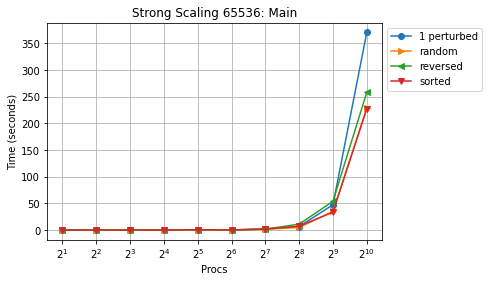

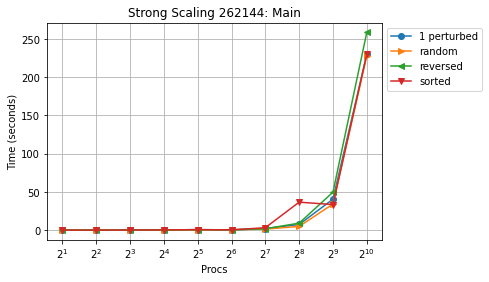

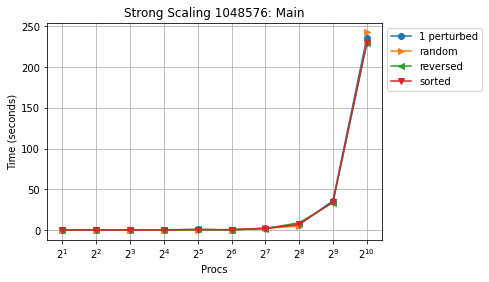

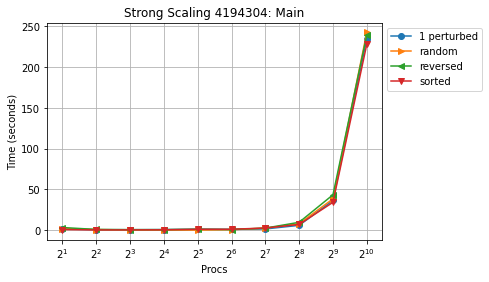

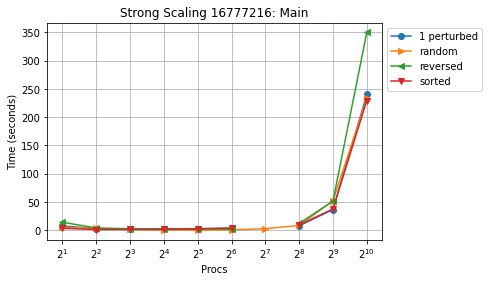

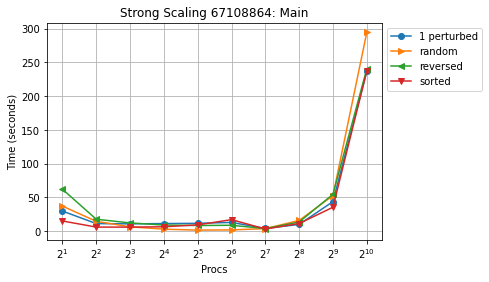

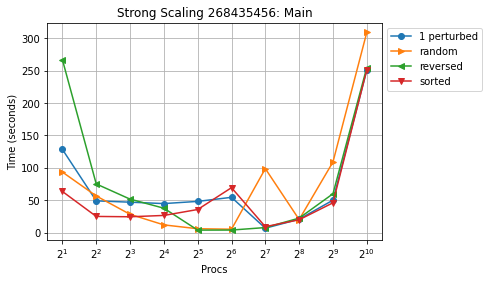

In [21]:
i = 0
for ctk in allctk:
    plot_mpl_inputtypes(
        df=ctk.dataframe[[sorttypes[0]]].loc["main"],
        df1= ctk.dataframe[[sorttypes[1]]].loc["main"],
        df2= ctk.dataframe[[sorttypes[2]]].loc["main"],
        df3= ctk.dataframe[[sorttypes[3]]].loc["main"],
        title=f"Strong Scaling {sizes[i]}: Main",
        xlabel="Procs",
        ylabel="Time (seconds)",
        label1='1 perturbed',
        label2='random',
        label3='reversed',
        label4= 'sorted'
    )
    i += 1

# Plot of 2

In [22]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["main"],
#         df1= ctk.dataframe[[temp[2]]].loc["main"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Main",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comp_Large Graphs (for 3 then 2)

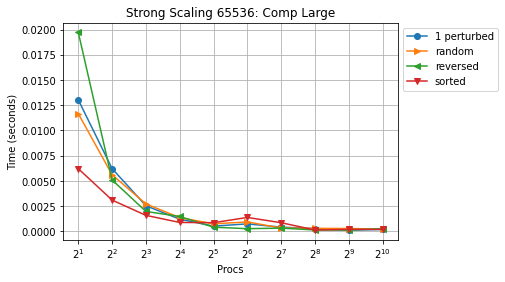

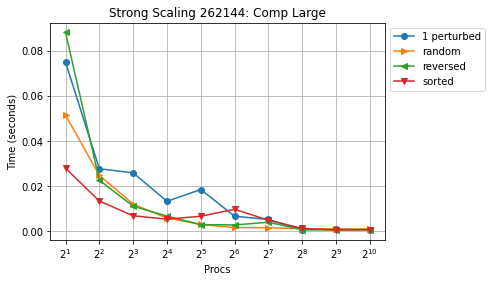

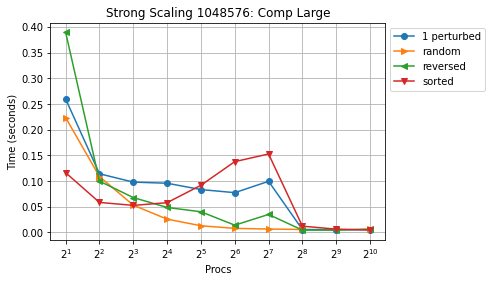

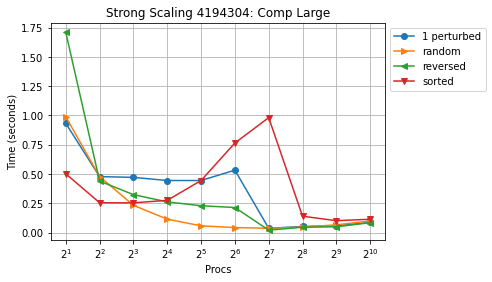

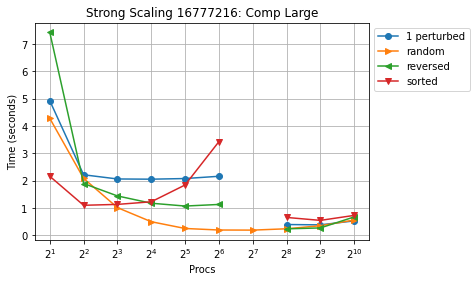

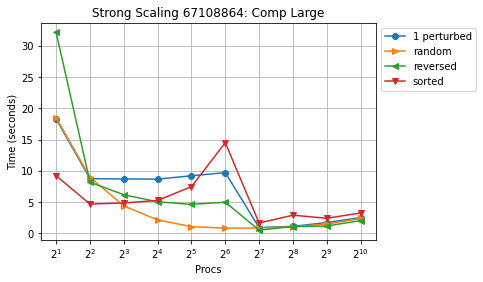

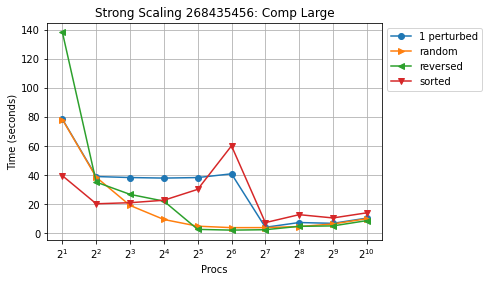

In [23]:
i = 0
for ctk in allctk:
    plot_mpl_inputtypes(
        df=ctk.dataframe[[sorttypes[0]]].loc["comp_large"],
        df1= ctk.dataframe[[sorttypes[1]]].loc["comp_large"],
        df2= ctk.dataframe[[sorttypes[2]]].loc["comp_large"],
        df3= ctk.dataframe[[sorttypes[3]]].loc["comp_large"],
        title=f"Strong Scaling {sizes[i]}: Comp Large",
        xlabel="Procs",
        ylabel="Time (seconds)",
        label1='1 perturbed',
        label2='random',
        label3='reversed',
        label4= 'sorted'
    )
    i += 1

## Comm Graphs (for 3 then 2)

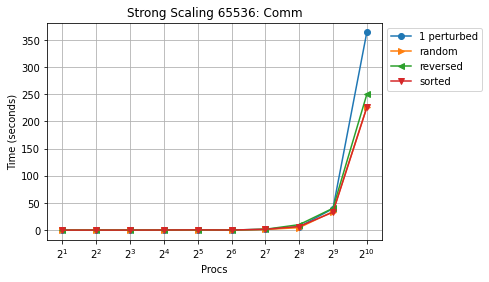

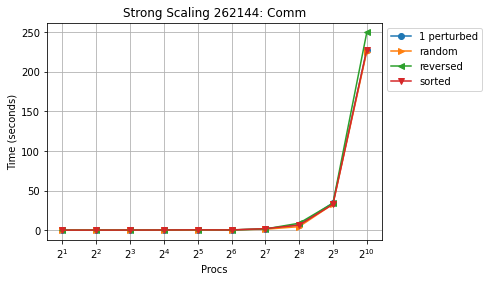

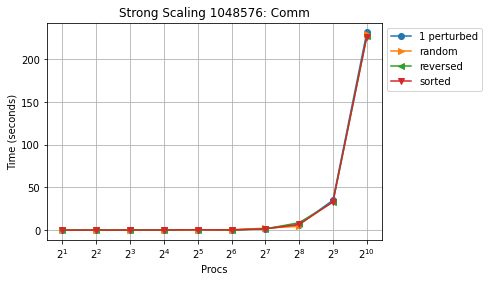

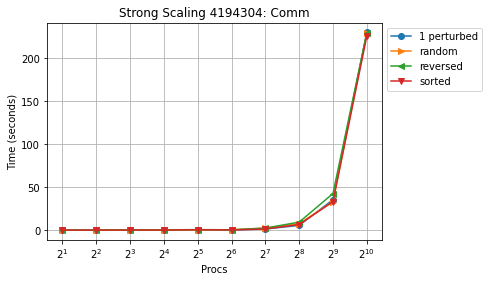

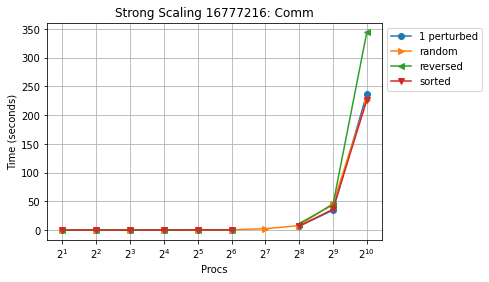

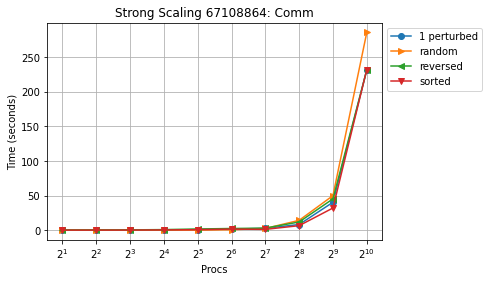

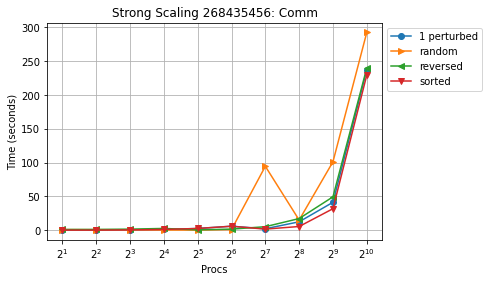

In [25]:
i = 0
for ctk in allctk:
    plot_mpl_inputtypes(
        df=ctk.dataframe[[sorttypes[0]]].loc["comm"],
        df1= ctk.dataframe[[sorttypes[1]]].loc["comm"],
        df2= ctk.dataframe[[sorttypes[2]]].loc["comm"],
        df3= ctk.dataframe[[sorttypes[3]]].loc["comm"],
        title=f"Strong Scaling {sizes[i]}: Comm",
        xlabel="Procs",
        ylabel="Time (seconds)",
        label1='1 perturbed',
        label2='random',
        label3='reversed',
        label4= 'sorted'
    )
    i += 1